<a href="https://colab.research.google.com/github/vimmiseth/StockAnalysis/blob/main/Copy_of_ML_In_Finance_Stock_Price_Predictions_Using_Regression_%26_LSTM_Skeleton.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#TASK #1: UNDERSTAND THE PROBLEM STATEMENT & BUSINESS CASE

![alt text](https://drive.google.com/uc?id=1U3eRNUYyza1A7EFopacJyujR87Vm_ae8)


![alt text](https://drive.google.com/uc?id=139zlnLGzYen-GbcnkXQZs44tf7OqV8e4)

#TASK #2: IMPORT DATASETS AND LIBRARIES


In [ ]:
# Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
import plotly.express as px
from copy import copy
from scipy import stats
import matplotlib.pyplot as plt
import numpy as np
import plotly.figure_factory as ff
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from tensorflow import keras


In [ ]:
# Read stock prices data
df_stock_prices = pd.read_csv('/content/drive/My Drive/Colab Notebooks/stocks.csv')
df_stock_prices.head(2)



,Date,AAPL,BA,T,MGM,AMZN,IBM,TSLA,GOOG,sp500
0,2012-01-12,60.198570,75.510002,30.120001,12.13,175.929993,180.550003,28.250000,313.644379,1295.500000
1,2012-01-13,59.972858,74.599998,30.070000,12.35,178.419998,179.160004,22.790001,311.328064,1289.089966


In [ ]:
# Read the stocks volume data
df_stock_volume = pd.read_csv('/content/drive/My Drive/Colab Notebooks/stock_volume.csv')
df_stock_volume.head(2)

,Date,AAPL,BA,T,MGM,AMZN,IBM,TSLA,GOOG,sp500
0,2012-01-12,53146800,3934500,26511100,17891100,5385800,6881000,729300,3764400,4019890000
1,2012-01-13,56505400,4641100,22096800,16621800,4753500,5279200,5500400,4631800,3692370000


In [ ]:
# Sort the data based on Date
df_stock_prices = df_stock_prices.sort_values(by = ['Date'])
df_stock_prices.head(2)

,Date,AAPL,BA,T,MGM,AMZN,IBM,TSLA,GOOG,sp500
0,2012-01-12,60.198570,75.510002,30.120001,12.13,175.929993,180.550003,28.250000,313.644379,1295.500000
1,2012-01-13,59.972858,74.599998,30.070000,12.35,178.419998,179.160004,22.790001,311.328064,1289.089966


In [ ]:
# Sort the volume data based on Date
df_stock_volume = df_stock_volume.sort_values(by = ['Date'])
df_stock_volume.head(2)

,Date,AAPL,BA,T,MGM,AMZN,IBM,TSLA,GOOG,sp500
0,2012-01-12,53146800,3934500,26511100,17891100,5385800,6881000,729300,3764400,4019890000
1,2012-01-13,56505400,4641100,22096800,16621800,4753500,5279200,5500400,4631800,3692370000


In [ ]:
# Check if Null values exist in stock prices data
df_stock_prices.isnull().sum()

Date     0
AAPL     0
BA       0
T        0
MGM      0
AMZN     0
IBM      0
TSLA     0
GOOG     0
sp500    0
dtype: int64

In [ ]:
# Check if Null values exist in stocks volume data
df_stock_volume.isnull().sum()

Date     0
AAPL     0
BA       0
T        0
MGM      0
AMZN     0
IBM      0
TSLA     0
GOOG     0
sp500    0
dtype: int64

In [ ]:
# Get stock prices dataframe info
df_stock_prices.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2159 entries, 0 to 2158
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    2159 non-null   object 
 1   AAPL    2159 non-null   float64
 2   BA      2159 non-null   float64
 3   T       2159 non-null   float64
 4   MGM     2159 non-null   float64
 5   AMZN    2159 non-null   float64
 6   IBM     2159 non-null   float64
 7   TSLA    2159 non-null   float64
 8   GOOG    2159 non-null   float64
 9   sp500   2159 non-null   float64
dtypes: float64(9), object(1)
memory usage: 185.5+ KB


In [ ]:
# Get stock volume dataframe info
df_stock_volume.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2159 entries, 0 to 2158
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Date    2159 non-null   object
 1   AAPL    2159 non-null   int64 
 2   BA      2159 non-null   int64 
 3   T       2159 non-null   int64 
 4   MGM     2159 non-null   int64 
 5   AMZN    2159 non-null   int64 
 6   IBM     2159 non-null   int64 
 7   TSLA    2159 non-null   int64 
 8   GOOG    2159 non-null   int64 
 9   sp500   2159 non-null   int64 
dtypes: int64(9), object(1)
memory usage: 185.5+ KB


**MINI CHALLENGE #1:**
- **What is the average trading volume for Apple stock?**
- **What is the maximum trading volume for sp500?**
- **Which security is traded the most? comment on your answer**
- **What is the average stock price of the S&P500 over the specified time period?**
- **What is the maximum price of Tesla Stock?**


In [ ]:
df_stock_volume['AAPL'].mean()

58203317.41547012

In [ ]:
df_stock_volume['sp500'].max()

9044690000

#TASK #3: PERFORM EXPLORATORY DATA ANALYSIS AND VISUALIZATION

In [ ]:
# Function to normalize stock prices based on their initial price
def normaize_df(df):
  x = df.copy()

  for i in df.coulmns[1:]:
    x[i] = x[i]/x[i][0]
  
  return x
  


In [ ]:
# Function to plot interactive plots using Plotly Express
def interactive_plot(df, title):
  fig = px.line(title = title)
  for i in df.columns[1:]:
    fig.add_scatter(x = df['Date'] , y= df[i], name = i)
  fig.show()

In [ ]:
# plot interactive chart for stocks data
interactive_plot(df_stock_prices, 'stock prices')

**MINI CHALLENGE #2:**
- **Plot the volume dataset for all stocks, list any observations you might see.**
- **Plot the normalized stock prices and volume dataset.**

# TASK #4: PREPARE THE DATA BEFORE TRAINING THE AI/ML MODEL

![alt text](https://drive.google.com/uc?id=1uXYYHfgeJyncu4BZRAooTC4iCclH9e9B)

In [ ]:
# Function to concatenate the date, stock price, and volume in one dataframe
df_stock_prices.head(2)

,Date,AAPL,BA,T,MGM,AMZN,IBM,TSLA,GOOG,sp500
0,2012-01-12,60.198570,75.510002,30.120001,12.13,175.929993,180.550003,28.250000,313.644379,1295.500000
1,2012-01-13,59.972858,74.599998,30.070000,12.35,178.419998,179.160004,22.790001,311.328064,1289.089966


In [ ]:
df_stock_volume.head(2)

,Date,AAPL,BA,T,MGM,AMZN,IBM,TSLA,GOOG,sp500
0,2012-01-12,53146800,3934500,26511100,17891100,5385800,6881000,729300,3764400,4019890000
1,2012-01-13,56505400,4641100,22096800,16621800,4753500,5279200,5500400,4631800,3692370000


In [ ]:
def stock_concat(df_price, df_volume, stock):
  df_concat = pd.DataFrame({'Date': df_price['Date'], 'Price': df_price[stock], 'Volume': df_volume[stock]})
  return df_concat

In [ ]:
df_concat = stock_concat(df_stock_prices, df_stock_volume, 'AAPL')
df_concat.head(2)

,Date,Price,Volume
0,2012-01-12,60.198570,53146800
1,2012-01-13,59.972858,56505400


In [ ]:
# Function to return the input/output (target) data for AI/ML Model
# Note that our goal is to predict the future stock price 
# Target stock price today will be tomorrow's price 
def trading_window(df):
  n=1;
  df['Target'] = df[['Price']].shift(-n)
  return df



In [ ]:
# Let's test the functions and get individual stock prices and volumes for AAPL


In [ ]:
df_concat = stock_concat(df_stock_prices, df_stock_volume, 'AAPL')
df_concat.head(5)

,Date,Price,Volume
0,2012-01-12,60.198570,53146800
1,2012-01-13,59.972858,56505400
2,2012-01-17,60.671429,60724300
3,2012-01-18,61.301430,69197800
4,2012-01-19,61.107143,65434600


In [ ]:
df_concat_shifted =  trading_window(df_concat)
df_concat_shifted.head(5)

,Date,Price,Volume,Target
0,2012-01-12,60.198570,53146800,59.972858
1,2012-01-13,59.972858,56505400,60.671429
2,2012-01-17,60.671429,60724300,61.301430
3,2012-01-18,61.301430,69197800,61.107143
4,2012-01-19,61.107143,65434600,60.042858


In [ ]:
# Remove the last row as it will be a null value
df_concat_shifted = df_concat_shifted[:-1]
df_concat_shifted

,Date,Price,Volume,Target
0,2012-01-12,60.198570,53146800,59.972858
1,2012-01-13,59.972858,56505400,60.671429
2,2012-01-17,60.671429,60724300,61.301430
3,2012-01-18,61.301430,69197800,61.107143
4,2012-01-19,61.107143,65434600,60.042858
...,...,...,...,...
2153,2020-08-04,438.660004,43267900,440.250000
2154,2020-08-05,440.250000,30498000,455.609985
2155,2020-08-06,455.609985,50607200,444.450012
2156,2020-08-07,444.450012,49453300,450.910004


In [ ]:
# Scale the data
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler( feature_range = (0,1))

df_concat_shifted_scaled = sc.fit_transform(df_concat_shifted.drop(columns = ['Date']))
df_concat_shifted_scaled

array([[0.01102638, 0.11442624, 0.01046185],
       [0.01046185, 0.12362365, 0.01220906],
       [0.01220906, 0.13517696, 0.01378478],
       ...,
       [1.        , 0.10747163, 0.97208751],
       [0.97208751, 0.10431171, 0.98824476],
       [0.98824476, 0.11430054, 0.95470465]])

In [ ]:
df_concat_shifted.describe()


,Price,Volume,Target
count,2158.000000,2.158000e+03,2158.000000
mean,140.682343,5.820857e+07,140.857182
std,70.555295,4.569135e+07,70.822737
min,55.790001,1.136200e+07,55.790001
25%,89.155000,2.769635e+07,89.234285
50%,116.559998,4.209240e+07,116.604999
75%,175.009995,7.185380e+07,175.024998
max,455.609985,3.765300e+08,455.609985


In [ ]:
# Create Feature and Target


In [ ]:
X = df_concat_shifted_scaled[:, :2]

X


array([[0.01102638, 0.11442624],
       [0.01046185, 0.12362365],
       [0.01220906, 0.13517696],
       ...,
       [1.        , 0.10747163],
       [0.97208751, 0.10431171],
       [0.98824476, 0.11430054]])

In [ ]:
Y = df_concat_shifted_scaled[ : , 2:]
Y

array([[0.01046185],
       [0.01220906],
       [0.01378478],
       ...,
       [0.97208751],
       [0.98824476],
       [0.95470465]])

In [ ]:
# Spliting the data this way, since order is important in time-series
# Note that we did not use train test split with it's default settings since it shuffles the data


In [ ]:
split = int(0.65 * len(X))
split

1402

In [ ]:
X_train = X[:split]
X_train

array([[0.01102638, 0.11442624],
       [0.01046185, 0.12362365],
       [0.01220906, 0.13517696],
       ...,
       [0.25161323, 0.02518813],
       [0.25766595, 0.02877662],
       [0.26084239, 0.06803417]])

In [ ]:
Y_train = Y[:split]
Y_train

array([[0.01046185],
       [0.01220906],
       [0.01378478],
       ...,
       [0.25766595],
       [0.26084239],
       [0.26329349]])

In [ ]:
X_test = X[split:]
Y_test = Y[split:]

In [ ]:
def show_plot(data, title):
  plt.figure(figsize =(10,5))
  plt.plot(data, linewidth =3)
  plt.title(title)
  plt.grid()

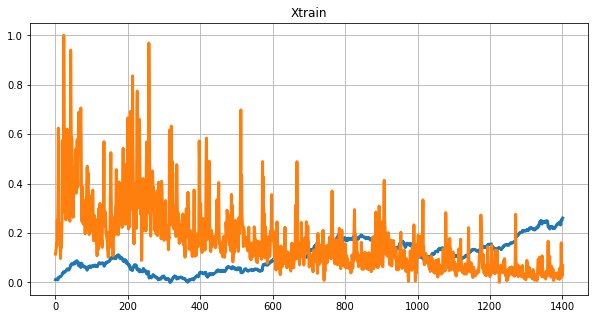

In [ ]:
show_plot(X_train, 'Xtrain')

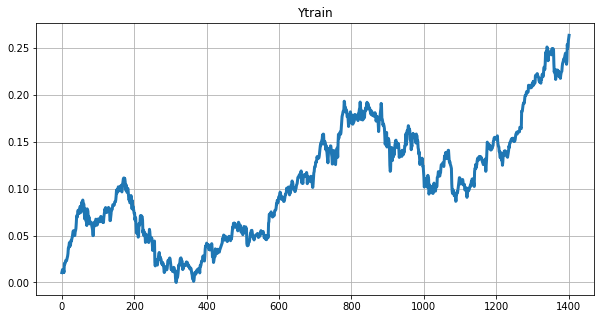

In [ ]:
show_plot(Y_train, 'Ytrain')

In [ ]:
# Define a data plotting function




**MINI CHALLENGE #3:**
- **Test the created pipeline with S&P500 and Amazon datasets**

# TASK #5: UNDERSTAND THE THEORY AND INTUITION BEHIND REGRESSION 

![alt text](https://drive.google.com/uc?id=1wJHaXRzsqMi713Qkzo2IQgZTmsDxU8f7)

![alt text](https://drive.google.com/uc?id=1vDuV9M1b6KF5yIvWpiUqhI7zSr7CKk5g)

![alt text](https://drive.google.com/uc?id=1H-wED3vnYj3ZpsvK0dOEPwYGVjSVhpfI)

![alt text](https://drive.google.com/uc?id=1KM0yvHp1DjVZ87uf68yJdqj2Sh_oTLLT)

# TASK #6: UNDERSTAND THE CONCEPT OF REGULARIZATION & RIDGE REGRESSION

![alt text](https://drive.google.com/uc?id=1m9NX1aEDLAW2QCqeiQMYggnY3ovVW8QO)

![alt text](https://drive.google.com/uc?id=13Wn7UkxVkbRlIiJ-rZIrqAItfumj_wzi)

![alt text](https://drive.google.com/uc?id=1WB1wdMUYqDNAhCytmk889w9SVQQVrwlt)

![alt text](https://drive.google.com/uc?id=1IsQLtMZbKMyITX_FVr50ZkB68uUuQwmB)

![alt text](https://drive.google.com/uc?id=1D37GCrEMLdFwjTQL9WIoPEsLlEyITuX5)

![alt text](https://drive.google.com/uc?id=1IBz73HFZPUD6wTEoerXGFTJKhhZyAyb9)

# TASK #7: BUILD AND TRAIN A RIDGE LINEAR REGRESSION MODEL

In [ ]:
from sklearn.linear_model import Ridge
# Note that Ridge regression performs linear least squares with L2 regularization.
# Create and train the Ridge Linear Regression  Model
my_regression_model = Ridge()
my_regression_model.fit(X_train, Y_train)

Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

In [ ]:
# Test the model and calculate its accuracy 
accuracy_cnt = my_regression_model.score(X_test, Y_test)
print('accuracy_cnt :',accuracy_cnt)


accuracy_cnt : 0.7950028030821767


In [ ]:
# Make Prediction
predicted_prices = my_regression_model.predict(X)
predicted_prices

array([[0.03466412],
       [0.03374627],
       [0.03451936],
       ...,
       [0.81048342],
       [0.78876033],
       [0.80091324]])

In [ ]:
# Append the predicted values into a list


In [ ]:
df_predicted = []
for i in predicted_prices:
  df_predicted.append(i[0])


In [ ]:
# Append the close values to the list
df_Actual_Price = []
for i in df_concat_shifted_scaled:
  df_Actual_Price.append(i[0])


In [ ]:
# Create a dataframe based on the dates in the individual stock data
df_price_predicted = df_concat_shifted[['Date']]

In [ ]:
# Add the close values to the dataframe
df_price_predicted['Actual_Price'] = df_Actual_Price
df_price_predicted


,Date,Actual_Price
0,2012-01-12,0.011026
1,2012-01-13,0.010462
2,2012-01-17,0.012209
3,2012-01-18,0.013785
4,2012-01-19,0.013299
...,...,...
2153,2020-08-04,0.957606
2154,2020-08-05,0.961583
2155,2020-08-06,1.000000
2156,2020-08-07,0.972088


In [ ]:
# Add the predicted values to the dataframe
df_price_predicted['Predicted_Price'] = predicted_prices

In [ ]:
# Plot the results
interactive_plot(df_price_predicted, 'Original Vs Predicted')

**MINI CHALLENGE #4:**
- **Experiment with various regularization values for alpha** 
- **What is the impact of increasing alpha?**
- **Note: default value for alpha is = 1**


# TASK #8: UNDERSTAND THE THEORY AND INTUITION BEHIND NEURAL NETWORKS

![alt text](https://drive.google.com/uc?id=1U2auh7KSalF4qc8iWFScawEB3TniFeXw)

![alt text](https://drive.google.com/uc?id=1xsy74Dj9JyuvwcPzmQcwN9hzHGevAvKB)

![alt text](https://drive.google.com/uc?id=1b2wIRl63jXgyoh_w1ysxk3XvTJ5j8864)

# TASK #9: UNDERSTAND HOW DO ARTFICIAL NEURAL NETWORKS TRAIN 

![alt text](https://drive.google.com/uc?id=1pg1rxBoHDtRNVNN0TyMvnCMVKw9ni5pN)

![alt text](https://drive.google.com/uc?id=1wc4NOBLC55Hb2s8s_hLI2LWykV4WmLwU)

![alt text](https://drive.google.com/uc?id=1zI3MbDUAws-gpPisqDrVL8BoupWRO6KJ)

![alt text](https://drive.google.com/uc?id=1twCXUdFtdFMGsicoQOWI0a9RiHMZ9MK_)

# TASK #10: UNDERSTAND THE THEORY AND INTUITION BEHIND RECURRENT NEURAL NETWORKS

![alt text](https://drive.google.com/uc?id=1a6w38XX_W2Zcsvde5FDepUax1aRyvnBT)

![alt text](https://drive.google.com/uc?id=1tc1SRSaFp-zuvujAQY66E_JEoY6doI0m)

![alt text](https://drive.google.com/uc?id=10xmgZjv2IjaY4xFm81rwgKqOC0119tug)

![alt text](https://drive.google.com/uc?id=1CwBOagYD82QaayeGDndRjb_Irm5HIwBs)

![alt text](https://drive.google.com/uc?id=148mslyqerZ_gLzQIkPFiDsewCO5nMNK7)

![alt text](https://drive.google.com/uc?id=1_Ky5ek9gq_Ov6VLTkXFmmzEhvjo91tpB)

# TASK #11: UNDERSTAND THE THEORY AND INTUITION BEHIND LONG SHORT TERM MEMORY NETWORKS

![alt text](https://drive.google.com/uc?id=1cd3jZpTuSzsPjMps6SRFqvXNfs4jA_vu)

![alt text](https://drive.google.com/uc?id=1URS5Ny54g-c3ookAL1FLn28TYFlbDIdG)

![alt text](https://drive.google.com/uc?id=1Cm3Unnn_b71rfklW_ejm50xYOYkXh8cl)

![alt text](https://drive.google.com/uc?id=1pU8lbF965n38ZspjIFsEAU3CEjpclpfd)

![alt text](https://drive.google.com/uc?id=1zSqTnPZDfiz6qRgMHaFB9wpB55Fnzwf4)

# TASK #12: TRAIN AN LSTM TIME SERIES MODEL

In [ ]:
# Let's test the functions and get individual stock prices and volumes for AAPL


In [ ]:
# Get the close and volume data as training data (Input)


In [ ]:
# Normalize the data


In [ ]:
# Create the training and testing data, training data contains present day and previous day values


In [ ]:
# Convert the data into array format


In [ ]:
# Split the data


In [ ]:
# Reshape the 1D arrays to 3D arrays to feed in the model


In [ ]:
# Create the model


In [ ]:
# Train the model


In [ ]:
# Make prediction


**MINI CHALLENGE #5:**
- **Test the pipeline with at least 3 other stocks** 
- **Experiment with various LSTM model parameters (Ex: Use 150 units instead of 50), print out the model summary and retrain the model**


# **EXCELLENT JOB! YOU SHOULD BE TRULY PROUD WITH THE NEWLY ACQUIRED SKILLS**

# **MINI CHALLENGE SOLUTIONS**

**MINI CHALLENGE #1 SOLUTION:**
- **What is the average trading volume for Apple stock?**
- **What is the maximum trading volume for sp500?**
- **Which security is traded the most? comment on your answer**
- **What is the average stock price of the S&P500 over the specified time period?**
- **What is the maximum price of Tesla Stock?**

In [ ]:
# Get the statistical data for the stocks volume dataframe
# Average trading volume for Apple stock is 2.498238e+06	
# Average trading volume for S&P500 is 3.680732e+09

# Why S&P500 is the most traded of all? Check out this article: 
# https://www.investopedia.com/articles/personal-finance/022216/put-10000-sp-500-etf-and-wait-20-years.asp

# Text from the article above:
# "The S&P 500 index is a broad-based measure of large corporations traded on U.S. stock markets. Over long periods of time, 
# passively holding the index often produces better results than actively trading or picking single stocks.
# Over long-time horizons, the index typically produces better returns than actively managed portfolios."

stock_vol_df.describe()

In [ ]:
# Get the statistical data for the prices dataframe
stock_price_df.describe()

In [ ]:
# Average price for S&P500 = 2218.749554
# Maximum Tesla Price = 1643.000000

**MINI CHALLENGE #2 SOLUTION:**
- **Plot the normalized stock prices and volume dataset.**

In [ ]:
# Plot interactive chart for volume data
# Notice that S&P500 trading is orders of magnitude compared to individual stocks
interactive_plot(stock_vol_df, 'Stocks Volume')

In [ ]:
# plot interactive chart for normalized stocks prices data
interactive_plot(normalize(stock_price_df), 'Stock Prices')

# Let's normalize the data and re-plot interactive chart for volume data
interactive_plot(normalize(stock_vol_df), 'Normalized Volume')

**MINI CHALLENGE #3 SOLUTION:**
- **Test the pipeline with S&P500 and AMZN datasets instead of AAPL**

In [ ]:
# Let's test the functions and get individual stock prices and volumes for S&P500
price_volume_df = individual_stock(stock_price_df, stock_vol_df, 'sp500')
price_volume_df

# Let's test the functions and get individual stock prices and volumes for Amazon 
price_volume_df = individual_stock(stock_price_df, stock_vol_df, 'AMZN')
price_volume_df

**MINI CHALLENGE #4 SOLUTION:**
- **Experiment with various regularization value for alpha** 
- **What is the impact of increasing alpha?**
- **Note: default value for alpha is = 1**

In [ ]:
from sklearn.linear_model import Ridge
# Note that Ridge regression performs linear least squares with L2 regularization.
# Create and train the Ridge Linear Regression  Model
regression_model = Ridge(alpha = 2)
regression_model.fit(X_train, y_train)

**MINI CHALLENGE #5 SOLUTION:**
- **Test the pipeline with at least 3 other stocks** 
- **Experiment with various LSTM model parameters (Ex: Use 150 units instead of 50), print out the model summary and retrain the model**



In [ ]:
# Create the model
inputs = keras.layers.Input(shape=(X_train.shape[1], X_train.shape[2]))
x = keras.layers.LSTM(150, return_sequences= True)(inputs)
x = keras.layers.Dropout(0.3)(x)
x = keras.layers.LSTM(150, return_sequences=True)(x)
x = keras.layers.Dropout(0.3)(x)
x = keras.layers.LSTM(150)(x)
outputs = keras.layers.Dense(1, activation='linear')(x)

model = keras.Model(inputs=inputs, outputs=outputs)
model.compile(optimizer='adam', loss="mse")
model.summary()